In [46]:
from scipy import misc

img = misc.face()
type(img)

C:\Users\Seyeol\AppData\Local\Temp\ipykernel_2088\913133069.py:3: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  img = misc.face()


numpy.ndarray

%matplotlib inline: 매직명령어 중 하나로, jupyter 환경에서 그래프를 별도의 윈도우가 아니라 cell output으로 바로 볼 수 있도록 지시하는 명령어

In [47]:
# to display plots inline (use %matplotlib inline)
import matplotlib.pyplot as plt
%matplotlib inline  

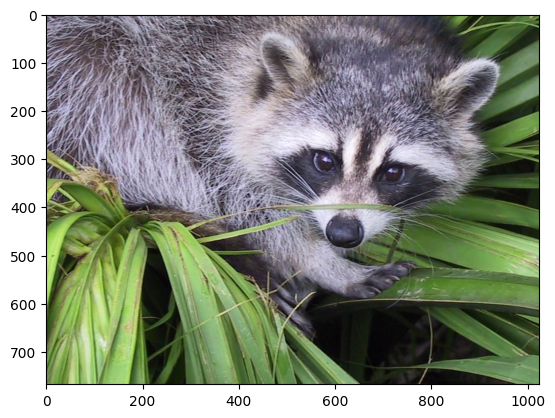

In [48]:
plt.imshow(img)
plt.show()

In [49]:
img.shape, img.ndim

((768, 1024, 3), 3)

img.shape: (axis=0의 위치, axis=1의 위치, RGBT 순서)  
- 따라서 (:, :, 0)은 위치별 Red 값을 의미한다.

In [50]:
img[:, :, 0], img[:, :, 0].shape

(array([[121, 138, 153, ..., 119, 131, 139],
        [ 89, 110, 130, ..., 118, 134, 146],
        [ 73,  94, 115, ..., 117, 133, 144],
        ...,
        [ 87,  94, 107, ..., 120, 119, 119],
        [ 85,  95, 112, ..., 121, 120, 120],
        [ 85,  97, 111, ..., 120, 119, 118]], dtype=uint8),
 (768, 1024))

In [51]:
img_array = img/255
img_array.max(), img_array.min(), img_array.dtype

(1.0, 0.0, dtype('float64'))

In [52]:
red_array = img_array[:, :, 0]
green_array = img_array[:, :, 1]
blue_array = img_array[:, :, 2]

Singular Value Decomposition: 특이값 분해  
- matrix를 3개의 행렬곱으로 분해하는 기법 (행렬분해, 차원축소, 데이터압축, 노이즈제거)  

In [53]:
from numpy import linalg

@ operator는 행렬곱을 나타낸다.  
- 이를 사용하여 RGB 값을 gray scale로 나타낼 수 있다.   
- A @ B = np.dot(A, B)

In [54]:
img_gray = img_array @ [0.2126, 0.7152, 0.0722]
img_gray.shape

(768, 1024)

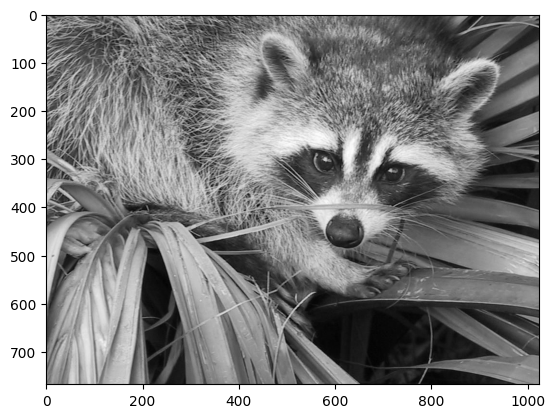

In [55]:
plt.imshow(img_gray, cmap='gray')
plt.show()

특이값 분해를 위해 다음 함수를 사용한다.  
- linalg.svd

In [56]:
U, s, Vt = linalg.svd(img_gray)
U.shape, s.shape, Vt.shape

((768, 768), (768,), (1024, 1024))

np.fill_diagonal()은 matrix의 diagonal 값을 vector 성분으로 배치한다.  

In [57]:
import numpy as np
# scale facor, s는 U의 열 갯수를 행의 갯수로, Vt 행의 갯수를 s의 열의 갯수로 dimension 설정한다.
Sigma = np.zeros([U.shape[1], Vt.shape[0]])
np.fill_diagonal(Sigma, s)

Approximation  
- np.allclose(a, b, rtole=1e-05, atol=1e-08, equal_nan=False),  
  두 numpy 배열이 거의 같은지 (수치적으로 근사적으로 같은지)를 판별하는 함수  
  > a, b: 비교하는 두 행렬  
  > rtole: relative tolerance, 상대적 허용오차  
  > atole: absolute tolerance, 절대적 허용오차  
  > equal_nan: NaN 값이 양쪽 배열에서 같은 위치에 있는 경우, True


In [58]:
# 아래 a, b의 각 요소가 오차 범위안에 있기 때문에 'True'가 반환된다.  
a = np.array([1.0, 2.0, 3.0])
b = np.array([1.01, 2.02, 3.03])
result = np.allclose(a, b, rtol=0.01, atol=0.02)
print(result)

True


In [59]:
linalg.norm(img_gray - U @ Sigma @ Vt)

1.3681498796160044e-12

We can check the values in s

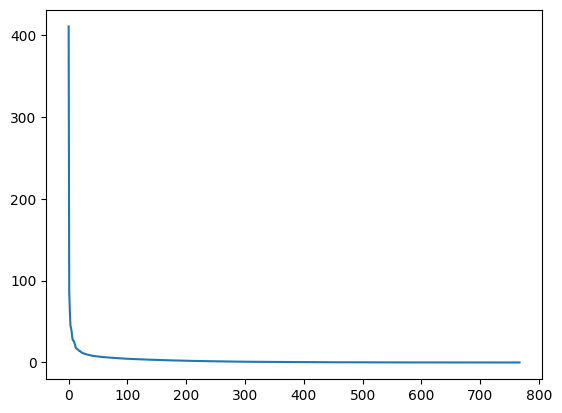

In [60]:
plt.plot(s)
plt.show()

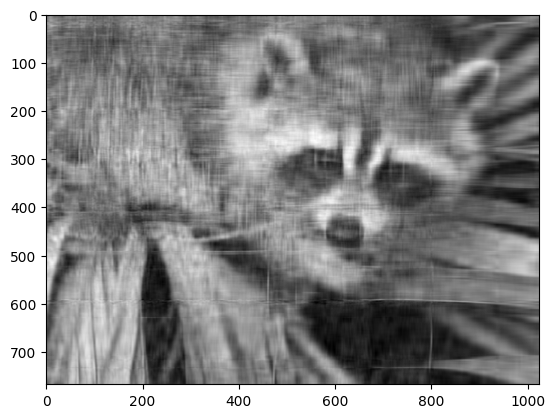

In [61]:
k = 20
approx = U @ Sigma[:, :k] @ Vt[:k, :]
plt.imshow(approx, cmap='gray')
plt.show()

Applying to all colors

In [62]:
img_array.shape

(768, 1024, 3)

Column의 위치를 바꾸는 방법  
- (i,  j,  k) ==> (k,  i,  j)  
  np.transpose(a, (2, 1, 0))

In [63]:
img_array_transposed = np.transpose(img_array, (2, 0, 1))
img_array_transposed.shape

(3, 768, 1024)

In [64]:
U, s, Vt = linalg.svd(img_array_transposed)
U.shape, s.shape, Vt.shape

((3, 768, 768), (3, 768), (3, 1024, 1024))

In [35]:
# products with n-dimensional arrays
Sigma = np.zeros((3, 768, 1024))
for j in range(3):
    np.fill_diagonal(Sigma[j, :, :], s[j, :])

In [69]:
reconstructed = U @ Sigma @ Vt
reconstructed.shape, reconstructed.min(), reconstructed.max()

((3, 768, 1024), -0.05938773884988581, 1.1732463803339979)

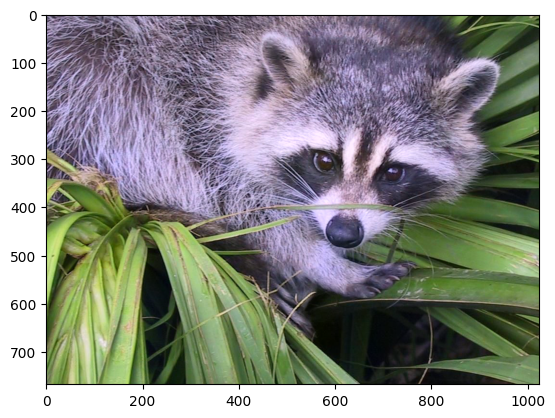

In [70]:
reconstructed = np.clip(reconstructed, 0, 1)
plt.imshow(np.transpose(reconstructed, (1, 2, 0)))
plt.show()

In [75]:
# 배열의 차원이 높을 때, 일일이 표현이 귀찮으면 '...' 이렇게 표기
approx_img = U @ Sigma[..., :k] @ Vt[..., :k, :]
approx_img.shape

(3, 768, 1024)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


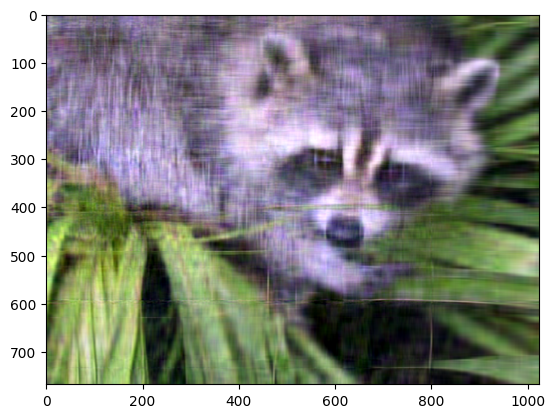

In [76]:
plt.imshow(np.transpose(approx_img, (1, 2, 0)))
plt.show()